In [1]:
!wget --no-check-certificate https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip  -O /tmp/horse-or-human.zip

--2022-05-02 12:28:17--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   259MB/s    in 0.5s    

2022-05-02 12:28:17 (259 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [3]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
 
train_human_dir = os.path.join('/tmp/horse-or-human/humans')

train_horse_names = os.listdir(train_horse_dir)
train_human_names = os.listdir(train_human_dir)

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [5]:
from tensorflow.keras.optimizers import RMSprop
 
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(rescale=1./255)
 
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/', 
        target_size=(300, 300),
        batch_size=128,
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [7]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs= 15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 85s 10s/step - loss: 1.2461 - acc: 0.5312
Epoch 2/15
8/8 [==============================] - 69s 8s/step - loss: 0.6546 - acc: 0.6340
Epoch 3/15
8/8 [==============================] - 73s 9s/step - loss: 0.6155 - acc: 0.7197
Epoch 4/15
8/8 [==============================] - 69s 8s/step - loss: 0.5482 - acc: 0.7898
Epoch 5/15
8/8 [==============================] - 69s 10s/step - loss: 0.4139 - acc: 0.8465
Epoch 6/15
8/8 [==============================] - 78s 10s/step - loss: 0.5023 - acc: 0.8633
Epoch 7/15
8/8 [==============================] - 78s 10s/step - loss: 0.1778 - acc: 0.9346
Epoch 8/15
8/8 [==============================] - 69s 8s/step - loss: 0.1580 - acc: 0.9444
Epoch 9/15
8/8 [==============================] - 69s 8s/step - loss: 0.8013 - acc: 0.8565
Epoch 10/15
8/8 [==============================] - 69s 8s/step - loss: 0.1363 - acc: 0.9522
Epoch 11/15
8/8 [==============================] - 73s 10s/step - loss: 0.1960 - acc:

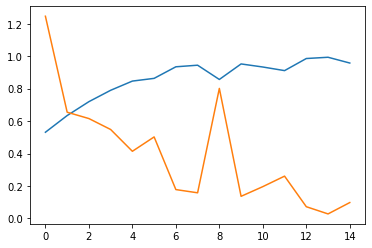

In [8]:
import pandas as pd

history_df = pd.DataFrame(history.history)

history_df['acc'].plot();
history_df['loss'].plot();

In [11]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():

  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " é um humano")
  else:
    print(fn + " é um cavalo")

Saving Cavalo.jpg to Cavalo (1).jpg
[0.]
Cavalo.jpg é um cavalo


In [12]:
uploaded = files.upload()
 
for fn in uploaded.keys():

  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " é um humano")
  else:
    print(fn + " é um cavalo")

Saving Cavalo2.jpg to Cavalo2.jpg
[1.6737741e-27]
Cavalo2.jpg é um cavalo


In [13]:
uploaded = files.upload()
 
for fn in uploaded.keys():

  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " é um humano")
  else:
    print(fn + " é um cavalo")

Saving Humano.jpg to Humano (2).jpg
[1.]
Humano.jpg é um humano


In [14]:
uploaded = files.upload()
 
for fn in uploaded.keys():

  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " é um humano")
  else:
    print(fn + " é um cavalo")

Saving Humano2.jpg to Humano2.jpg
[1.]
Humano2.jpg é um humano
